## Week 2
More with numpy, reading text files, building time series, reading NC files

In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as py

### Numpy loadtxt
Last week we used the built-in Python function "open" to read in a text file. The numpy package also has a file reading function.

In [3]:
filename = 'maunaloadata.csv'
print('Read in the data from file', filename)
data = np.loadtxt(filename, skiprows=57, delimiter = ',')

Read in the data from file maunaloadata.csv


In [4]:
data.shape

(732, 10)

 We have a 2-dimensional numpy data array. 732 rows and 10 columns. Recall that we want to access the columns for date and CO2

In [5]:
date = data[:,3] #accessing all rows and column 3
dataCO2 = data[:,8] #accessing all rows and column 8

#print the first 10 elements of each to check that it looks correct
print(date[:10])
print(dataCO2[:10])

[1958.0411 1958.126  1958.2027 1958.2877 1958.3699 1958.4548 1958.537
 1958.6219 1958.7068 1958.789 ]
[-99.99 -99.99 315.7  317.45 317.51 317.23 315.86 314.93 313.2  312.43]


### Plotting
This is similar to last week but now we'll generate a subplot within the figure so we have more options

Text(0.5, 1.0, 'Most important global environmental plot')

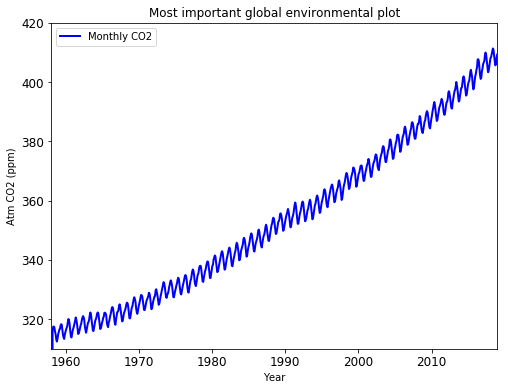

In [6]:
fig = py.figure(figsize=(8,6))
myfontsize=12
ax1 = fig.add_subplot(1,1,1) #row, column, plot number
ax1.plot(date, dataCO2, color='blue', linewidth=2, label='Monthly CO2')
ax1.set_xlim(1958, 2019)
ax1.set_ylim(310, 420)
ax1.set_ylabel('Atm CO2 (ppm)')
ax1.set_xlabel('Year')
ax1.legend(loc='upper left')
ax1.tick_params(labelsize = myfontsize)
ax1.set_title('Most important global environmental plot')


### More with numpy
#### vstack function

In [7]:
combined = np.vstack((date, dataCO2)) #this vertically combines the 2 vectors into an array

In [8]:
combined.shape

(2, 732)

We have 2 rows and 732 columns. We want to transpose this

In [9]:
combined = combined.T
combined.shape

(732, 2)

#### Defining a new array

In [10]:
a = np.array([1,2,3,4])
a

array([1, 2, 3, 4])

In [11]:
a*5

array([ 5, 10, 15, 20])

### Analyzing the changing amplitude of the seasonal cycle

In [12]:
month = np.arange(1,13) #arange is "array range". It works like range() but for numpy arrays. 

In [13]:
print(month)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [14]:
firstCO2 = dataCO2[12:24] #year 1959 is values 12 through 23
lastCO2 = dataCO2[-12:] #the last 12 values are 2018

In [15]:
print(firstCO2)

[315.58 316.48 316.65 317.72 318.29 318.15 316.54 314.8  313.84 313.33
 314.81 315.58]


In [16]:
print(lastCO2)

[408.05 408.34 409.25 410.3  411.3  410.88 408.9  407.1  405.59 405.99
 408.12 409.23]


In [17]:
firstCO2n = firstCO2 - np.mean(firstCO2) #subtract the mean
lastCO2n = lastCO2 - np.mean(lastCO2)

#### Repeat plotting with one line for firstCO2 and one line for lastCO2

Text(0.5, 1.0, 'Cycle of CO2')

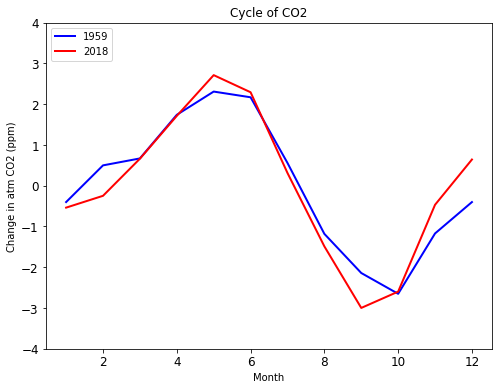

In [18]:
fig = py.figure(figsize=(8,6))
myfontsize=12
ax1 = fig.add_subplot(1,1,1)
ax1.plot(month, firstCO2n, color='blue', linewidth=2, label='1959')
ax1.plot(month, lastCO2n, color='red', linewidth=2, label='2018')
ax1.set_ylim(-4, 4)
ax1.set_ylabel('Change in atm CO2 (ppm)')
ax1.set_xlabel('Month')
ax1.legend(loc='upper left')
ax1.tick_params(labelsize = myfontsize)
ax1.set_title('Cycle of CO2')

### Working with NC files

Run the following lines in your Anaconda Prompt (Windows) or Terminal (Mac). We will be using the xarray package

conda install xarray dask netCDF4 bottleneck

conda install -c conda-forge xarray cartopy pynio pseudonetcdf

In [19]:
import xarray

In [20]:
filename = 'precipdata.nc'
file = xarray.open_dataset(filename)

In [21]:
file

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 452)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-08-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    description:           http://eagle1.umd.edu/GPCP_ICDR/GPCPmonthlyV2.3.pdf
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:       

### Functions
Functions are a bundle of instructions, placed at the top of a script. They are useful if you want to use a few lines repeatedly

In [22]:
def sumnum(a, b):
    c = a + b
    return c

We just defined a function called sumnum which adds 2 numbers and returns the sum

In [23]:
d = 5
e = 7
f = sumnum(d, e)
print(f)

12


Let's practice by writing a function that calculates a mean. Instead of using np.mean(), write a for loop to add all the numbers in an array together and divide by the number of elements. 

In [24]:
def meannum(a): #"a" is a placeholder. It is defined only within the function and doesn't need to exist elsewhere
    total = 0
    for element in a:
        total = total + element
    return total/len(a)


In [25]:
rannum = np.random.randn(1000) #1000 random numbers from a normal distribution
print (np.mean(rannum))
print (meannum(rannum)) #make sure they're equivalent


0.023183152604940357
0.023183152604940402


### A side note on loops
There are 2 ways of thinking when writing loops. The first is the traditional way of accessing the "index space" of a list or array. You iterate over all the incides (0 up through the length of the array) and access array[i] for each:

In [28]:
a = np.array([1,2,3,4,5])
lena = len(a)
for i in range(lena):
    print('\t', i, a[i])

	 0 1
	 1 2
	 2 3
	 3 4
	 4 5


The second is the more "Pythonic" way, of accessing the elements directly. You don't use "range" or "len"

In [29]:
for i in a:
    print(i)
    

1
2
3
4
5


Notice that it printed the array elements directly and never used their indices. a[i] does not exist